In [208]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
from scipy.stats import pearsonr,spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
!pip install pyod
from pyod.models.knn import KNN
import matplotlib

 Simulated plantcube archive dataset is uploaded in the input folder which is read as dataframe using pandas library

In [209]:
plant_data  = pd.read_csv(r"../input/simulated_plantcube_archive.csv")
plant_data.head()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Timestamp,Temperature Layer A,Cube ID,Temperature Layer B,Wifi Level,Connected,Door,Tank Level,Humidity Layer A,Humidity Layer B,Fan Speed
0,196910,1451606401,NaN,49,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,381282,1451606402,NaN,95,25.711898671792053°C,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,193237,1451606402,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0%
3,221475,1451606402,NaN,55,NaN,NaN,NaN,NaN,NaN,NaN,8.594411333817883g/m3,NaN
4,362919,1451606403,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0%


Number of observations and columns can be seen by printing the shape of the data frame

In [210]:
plant_data.shape

(400287, 12)

Lets check the correlation between the features to identify the relationship

In [211]:
correlation_matrix = plant_data.corr()
print("Pearson corelation of variable{}".format(correlation_matrix))

Pearson corelation of variable            Unnamed: 0  Timestamp   Cube ID  Wifi Level  Connected      Door
Unnamed: 0    1.000000   0.002439  0.999926    0.000070   0.002816  0.008014
Timestamp     0.002439   1.000000 -0.000002   -0.001597   0.012015 -0.018767
Cube ID       0.999926  -0.000002  1.000000    0.000066   0.002826  0.008064
Wifi Level    0.000070  -0.001597  0.000066    1.000000        NaN       NaN
Connected     0.002816   0.012015  0.002826         NaN   1.000000       NaN
Door          0.008014  -0.018767  0.008064         NaN        NaN  1.000000


A strong correlation can be observed between *Unnamed* column and *Cube ID* column. Let's check for the missing values.

In [212]:
#check obeservations which has null values
nan_values = plant_data.isnull().sum(axis=0)
print('missing data:\n {}'.format(nan_values))

missing data:
 Unnamed: 0                  0
Timestamp                   0
Temperature Layer A    281051
Cube ID                     0
Temperature Layer B    282207
Wifi Level             388956
Connected              383821
Door                   394714
Tank Level             379185
Humidity Layer A       395731
Humidity Layer B       395744
Fan Speed              300887
dtype: int64


Except 3 columns *(Unnamed, Timestamp, Cube ID)* remaining columns have lot of missing values; Remaining columns are not correlated and also have huge amount of missing values, so these columns can be ignored

In [213]:
cleaned_data = plant_data.dropna(axis=1)
cleaned_data.head()

,Unnamed: 0,Timestamp,Cube ID
0,196910,1451606401,49
1,381282,1451606402,95
2,193237,1451606402,48
3,221475,1451606402,55
4,362919,1451606403,90


In [214]:
cleaned_data.shape

(400287, 3)

Renaming the unnamed column by removing space and digit

In [215]:
cleaned_data.rename(columns={"Unnamed: 0": "unnamed"}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


Unique plant cube ID's in the column

In [216]:
len(set(cleaned_data["Cube ID"]))

100

Frequency count of unique cube ids

In [217]:
cnts = Counter(cleaned_data["Cube ID"])
cnts

Counter({49: 4030,
         95: 4039,
         48: 4039,
         55: 4035,
         90: 4031,
         5: 4048,
         73: 4045,
         57: 4036,
         94: 4044,
         99: 4044,
         75: 4054,
         87: 4043,
         17: 4036,
         64: 4037,
         9: 4036,
         14: 4040,
         76: 4046,
         7: 4039,
         52: 4050,
         3: 4042,
         63: 4046,
         68: 4049,
         0: 4040,
         30: 4050,
         34: 4040,
         54: 4032,
         43: 4037,
         35: 4045,
         93: 4035,
         44: 4042,
         2: 4047,
         58: 4038,
         39: 4048,
         25: 4047,
         38: 2799,
         40: 4029,
         71: 4030,
         42: 4041,
         45: 4052,
         27: 4031,
         11: 4045,
         77: 4051,
         15: 4036,
         37: 4029,
         98: 4039,
         65: 4031,
         41: 4036,
         70: 4031,
         4: 4033,
         62: 4037,
         50: 4045,
         21: 4051,
         22: 4038,


Except cube id:46, cube id:38 and cube id: 20 whose frequency counts are 1609, 2799, and 3971 reamining cube ids are equally distributed 

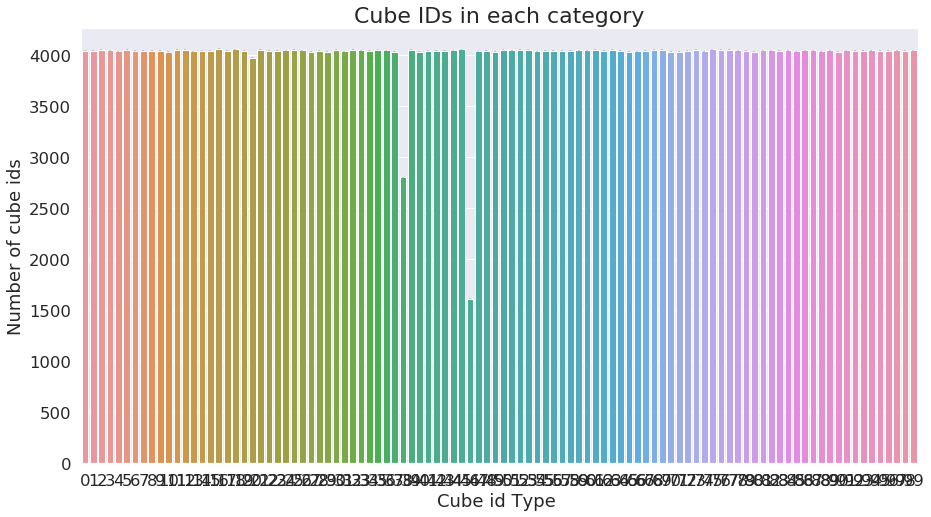

In [246]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,8))

ax= sns.barplot(list(cnts.keys()), list(cnts.values()))

plt.title("Cube IDs in each category", fontsize=22)
plt.ylabel('Number of cube ids', fontsize=18)
plt.xlabel('Cube id Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = cnts.values()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=0)

plt.show()

In [219]:
pear_corr, _ = pearsonr(cleaned_data["unnamed"], cleaned_data["Cube ID"])
spear_corr, _ = spearmanr(cleaned_data["unnamed"], cleaned_data["Cube ID"])
print('Pearsons correlation: %.3f' % pear_corr)
print('Spearman correlation: %.3f' % spear_corr)

Pearsons correlation: 1.000
Spearman correlation: 1.000


Both pearson and spearman correlation is checked between the columns *unnamed* and *Cube ID* which is high

In [220]:
#cleaned_data["Timestamp"] = pd.to_datetime(cleaned_data["Timestamp"])
cleaned_data = cleaned_data.sort_values(by="Timestamp")

cleaned_data

,unnamed,Timestamp,Cube ID
0,196910,1451606401,49
1,381282,1451606402,95
2,193237,1451606402,48
3,221475,1451606402,55
4,362919,1451606403,90
...,...,...,...
400282,153470,1455929708,37
400283,299258,1455929721,74
400284,28284,1455929825,6
400285,149441,1455929967,36


Observations are sorted according to the timestamp

In [221]:
cleaned_data.tail()

,unnamed,Timestamp,Cube ID
400282,153470,1455929708,37
400283,299258,1455929721,74
400284,28284,1455929825,6
400285,149441,1455929967,36
400286,4039,1455929993,0


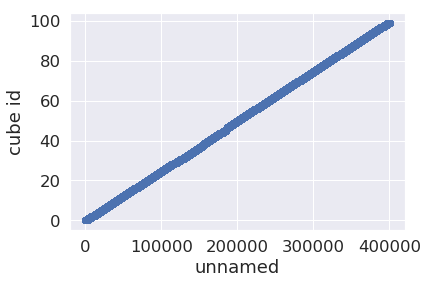

In [247]:
plt.scatter(cleaned_data["unnamed"], cleaned_data["Cube ID"])
plt.xlabel("unnamed")
plt.ylabel("cube id")
plt.show()

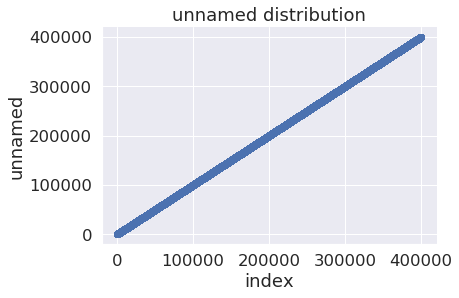

In [248]:
plt.scatter(range(cleaned_data.shape[0]), np.sort(cleaned_data["unnamed"].values))
plt.xlabel('index')
plt.ylabel('unnamed')
plt.title("unnamed distribution")
sns.despine()

Distribution of the column *unnamed* is visualized which is linear

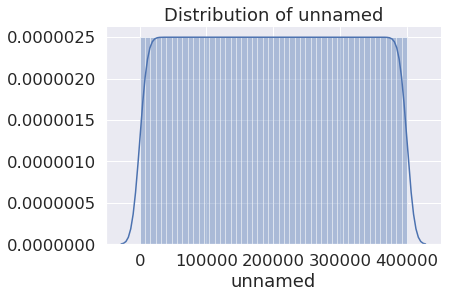

In [249]:
sns.distplot(cleaned_data["unnamed"])
plt.title("Distribution of unnamed")
sns.despine()

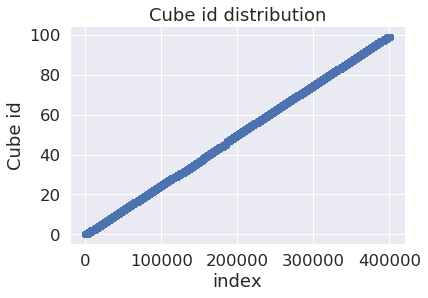

In [250]:
plt.scatter(range(cleaned_data.shape[0]), np.sort(cleaned_data["Cube ID"].values))
plt.xlabel('index')
plt.ylabel('Cube id')
plt.title("Cube id distribution")
sns.despine()

Cube id distribution is plotted which is linear.

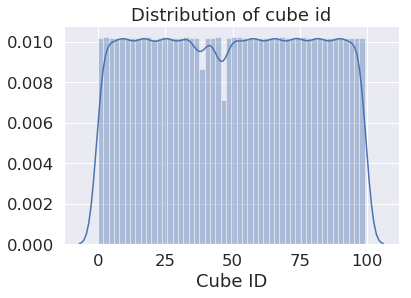

In [251]:
sns.distplot(cleaned_data["Cube ID"])
plt.title("Distribution of cube id")
sns.despine()

Unexpected behaviour used to identify unusual patterns is known as Anamoly (outlier) detection. This can be performed using various techniques like KNN, Angle-based Outlier Detection ,Oneclass SVM, Isolation forest, and Local Correlation Integral.

In the below code KNN method is used to identify the outliers which calculates the distance for any datapoint to the nearest K neighbours which could be seen as outliying score. This is one of the simple and powerful technique.

In [227]:
x_knn = cleaned_data[["unnamed","Cube ID"]]
outliers_fraction = 0.2
clf = KNN(contamination=outliers_fraction)
clf.fit(x_knn)
scores_pred = clf.decision_function(x_knn) * -1
y_pred = clf.predict(x_knn)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

df1 = cleaned_data
df1['outlier'] = y_pred.tolist()
            
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)


OUTLIERS:  2 INLIERS:  400285


 2 outliers have been identified using KNN method. which can be seen in the below line 

In [228]:
df1[df1["outlier"]==1]

,unnamed,Timestamp,Cube ID,outlier
198,0,1451606558,0,1
400261,400286,1455927689,99,1


As there is a high correlation between the columns Unnamed and Cube ID, Cube id can be predicted by training the model on unnamed column as input and cube id column as outut which is performed in the following lines of code using KNN algorithm

From the dataset 80% of the data is used to train the algorithm and  20% of the remaining data is used for testing the performance of the built model.

In [229]:
X_train, X_test, y_train, y_test = train_test_split(cleaned_data["unnamed"], cleaned_data["Cube ID"], test_size=0.2) 
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
X_train.shape
X_test.shape

(80058, 1)

In [230]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=11)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(X_test) 
print(predicted)

[64 41 11 ... 92 14  5]


Model is trained on the the dataX_train and y_train and the predictions are tested with the ground truth which is y_test and the model accuracy can be seen below

In [231]:
from sklearn import metrics
# Model Accuracy
print("Accuracy on test data:",metrics.accuracy_score(y_test, predicted))

Accuracy on test data: 0.9996127807339679


As expected model performed really well on the test set by achiving 99.97% accuracy in classifying the Cube ID based on the unnamed feature.

comparison of the model prediction and ground truth can be seen below

In [232]:
comparison = list(zip(y_test, predicted))
comparison

[(64, 64),
 (41, 41),
 (11, 11),
 (51, 51),
 (27, 27),
 (35, 35),
 (91, 91),
 (6, 6),
 (49, 49),
 (16, 16),
 (21, 21),
 (19, 19),
 (87, 87),
 (75, 75),
 (79, 79),
 (55, 55),
 (73, 73),
 (19, 19),
 (99, 99),
 (97, 97),
 (89, 89),
 (20, 20),
 (34, 34),
 (98, 98),
 (98, 98),
 (3, 3),
 (7, 7),
 (93, 93),
 (47, 47),
 (78, 78),
 (88, 88),
 (29, 29),
 (91, 91),
 (74, 74),
 (65, 65),
 (40, 40),
 (31, 31),
 (0, 0),
 (87, 87),
 (49, 49),
 (93, 93),
 (2, 2),
 (74, 74),
 (47, 47),
 (42, 42),
 (2, 2),
 (7, 7),
 (25, 25),
 (44, 44),
 (32, 32),
 (54, 54),
 (53, 53),
 (11, 11),
 (54, 54),
 (62, 62),
 (53, 53),
 (88, 88),
 (66, 66),
 (56, 56),
 (4, 4),
 (35, 35),
 (92, 92),
 (40, 40),
 (55, 55),
 (69, 69),
 (32, 32),
 (15, 15),
 (44, 44),
 (58, 58),
 (29, 29),
 (67, 67),
 (78, 78),
 (41, 41),
 (82, 82),
 (48, 48),
 (5, 5),
 (51, 51),
 (74, 74),
 (70, 70),
 (2, 2),
 (81, 81),
 (95, 95),
 (93, 93),
 (43, 43),
 (40, 40),
 (1, 1),
 (10, 10),
 (88, 88),
 (92, 92),
 (82, 82),
 (4, 4),
 (22, 22),
 (54, 54),
 